In [1]:
import sys, os

# Add KF_scripts to sys.path
KF_SCRIPTS_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if KF_SCRIPTS_DIR not in sys.path:
    sys.path.append(KF_SCRIPTS_DIR)

print("Added to sys.path:", KF_SCRIPTS_DIR)

# === 1. Imports ===
import pandas as pd
import numpy as np
import plotly.graph_objects as go



Added to sys.path: C:\Users\User\OneDrive\Projects\TradingSystem\KF_TradingSystem


***This processes the data on the selected file***

In [ ]:
# from data_utils import load_raw_df
# from filter_utils import clean_raw_data, apply_adaptive_kf

# df_raw = load_raw_df("TSLA", "2025-11-17", "2025-11-21", interval=5)
# df_clean = clean_raw_data(df_raw, Delta=5.0)
# df_kf = apply_adaptive_kf(df_clean, Delta=5.0)

# df_kf.head()


In [10]:
print(df_kf.columns)
print("Time range:", df_kf.index[0], "→", df_kf.index[-1])

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt'],
      dtype='object')
Time range: 2025-11-17 09:30:00-05:00 → 2025-11-17 15:59:55-05:00


***Visualize data***

In [11]:
# Plot up to step 6

start = '2025-11-17 09:30:00-05:00'
end   = '2025-11-17 15:59:55-05:00'
df_range = df_kf[(df_kf.index >= start) & (df_kf.index <= end)]


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_range.index, y=df_range['Mid'],
    mode='lines+markers',  # show both lines and dots
    name='Raw Mid-Price',
    line=dict(color='steelblue', width=1),
    marker=dict(size=4, color='steelblue')  # small dots
))



fig.add_trace(go.Scatter(
    x=df_range.index,
    y=df_range['KF_level_adapt'],
    mode='lines+markers',  # show both lines and dots
    name='Kalman Level adapted',
    line=dict(color='green', width=2),
    marker=dict(size=4, color='green')  # small dots
))


fig.update_layout(
    title='Interactive Mid-Price vs Kalman Smoothed Level',
    xaxis_title='Time',
    yaxis_title='Price',
    # hovermode='x unified',
    template='plotly_white',
    # legend=dict(x=0.01, y=0.99)
    legend=dict(x=0.02, y=0.98),
    height=700,
    # width=1000,
    # template='plotly_white',
    hovermode='x unified'
)

fig.show()


***Visualize slope***

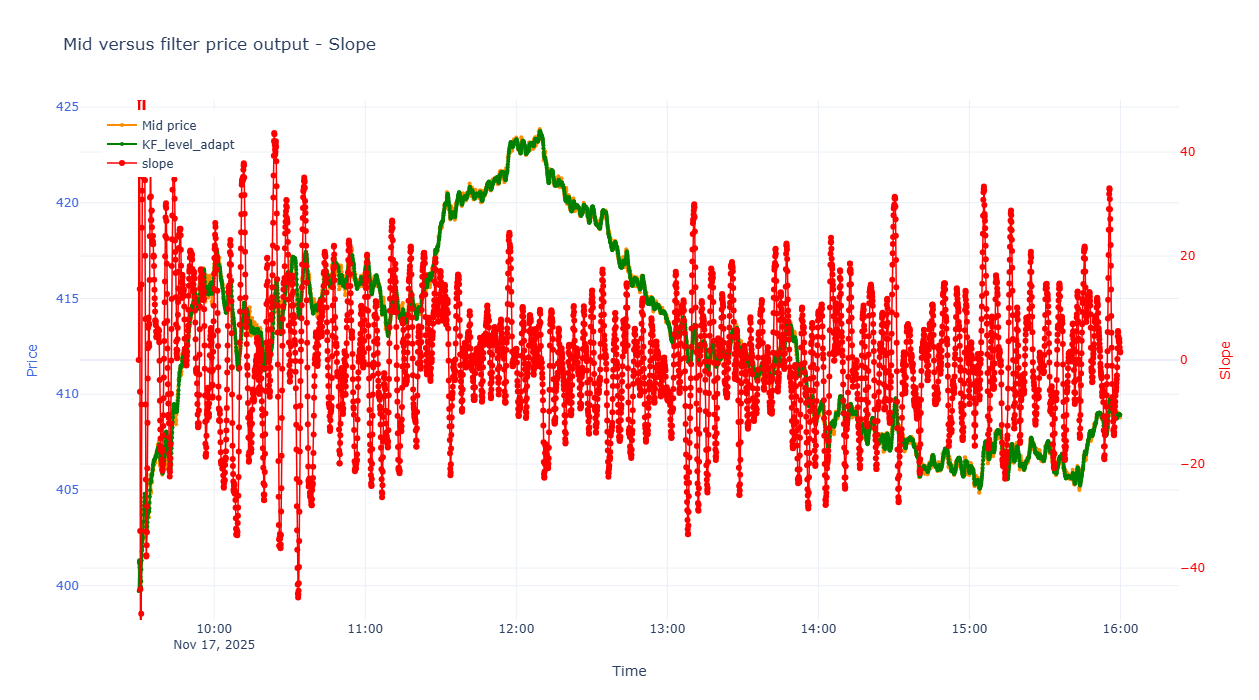

In [12]:

start = '2025-11-17 09:30:00-05:00'
end   = '2025-11-17 15:59:55-05:00'
df_range = df_kf[(df_kf.index >= start) & (df_kf.index <= end)]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_range.index,
    y=df_range['Mid'],
    mode='lines+markers',  # show both lines and dots
    name='Mid price',
    line=dict(color='darkorange', width=2),
    marker=dict(size=4, color='darkorange'),  # small dots
    yaxis='y1'
))
fig.add_trace(go.Scatter(
    x=df_range.index,
    y=df_range['KF_level_adapt'],
    mode='lines+markers',  # show both lines and dots
    name='KF_level_adapt',
    line=dict(color='green', width=2),
    marker=dict(size=4, color='green'),  # small dots
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=df_range.index, y=1000*df_range['KF_slope_adapt'],
    mode='lines+markers', name='slope',
    line=dict(color='red', width=1.5),
    yaxis='y2'
))


fig.update_layout(
    title='Mid versus filter price output - Slope',
    xaxis=dict(title='Time'),
    # xaxis=dict(title='Time', automargin=True, rangeslider=dict(visible=False), constrain='domain'),
    yaxis=dict(title='Price', color='royalblue'),
    yaxis2=dict(
        title='Slope',
        color='red',
        overlaying='y',  # share the same x-axis
        side='right',
        range=[-50,50]
    ),
    legend=dict(x=0.02, y=0.98),
    height=700,
    width=1000,
    template='plotly_white',
    hovermode='x unified'
    
)



fig.show()

In [ ]:
from data_utils import process_raw_to_processed, load_processed_df


df_proc = process_raw_to_processed("QQQ", "2025-11-19", "2025-11-20", 5, overwrite=True)

df_loaded = load_processed_df("QQQ", "2025-11-19", "2025-11-20", 5)




In [17]:
df_proc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt'],
      dtype='object')

**Plot QQQ from 19 to 20 Nov 2025**

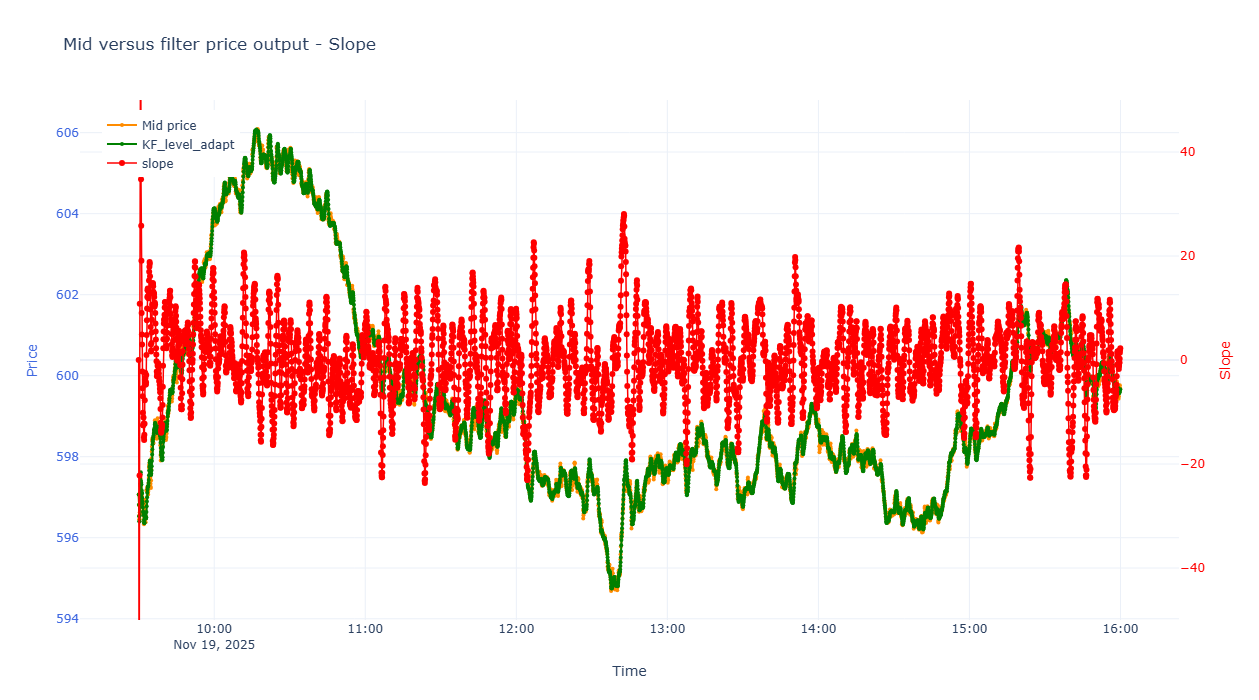

In [19]:

start = '2025-11-19 09:30:00-05:00'
end   = '2025-11-19 15:59:55-05:00'
df_range = df_proc[(df_proc.index >= start) & (df_proc.index <= end)]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_range.index,
    y=df_range['Mid'],
    mode='lines+markers',  # show both lines and dots
    name='Mid price',
    line=dict(color='darkorange', width=2),
    marker=dict(size=4, color='darkorange'),  # small dots
    yaxis='y1'
))
fig.add_trace(go.Scatter(
    x=df_range.index,
    y=df_range['KF_level_adapt'],
    mode='lines+markers',  # show both lines and dots
    name='KF_level_adapt',
    line=dict(color='green', width=2),
    marker=dict(size=4, color='green'),  # small dots
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=df_range.index, y=1000*df_range['KF_slope_adapt'],
    mode='lines+markers', name='slope',
    line=dict(color='red', width=1.5),
    yaxis='y2'
))


fig.update_layout(
    title='Mid versus filter price output - Slope',
    xaxis=dict(title='Time'),
    # xaxis=dict(title='Time', automargin=True, rangeslider=dict(visible=False), constrain='domain'),
    yaxis=dict(title='Price', color='royalblue'),
    yaxis2=dict(
        title='Slope',
        color='red',
        overlaying='y',  # share the same x-axis
        side='right',
        range=[-50,50]
    ),
    legend=dict(x=0.02, y=0.98),
    height=700,
    width=1000,
    template='plotly_white',
    hovermode='x unified'
    
)



fig.show()

**Implementation of turning points**

In [20]:
from data_utils import load_processed_df
from label_utils import label_turning_points

# Load KF-processed data
df = load_processed_df("QQQ", "2025-11-19", "2025-11-20", 5)

# Apply turning point labeling
df_tp = label_turning_points(df, column="KF_level_adapt", L=20)

df_tp.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt', 'TP_label'],
      dtype='object')

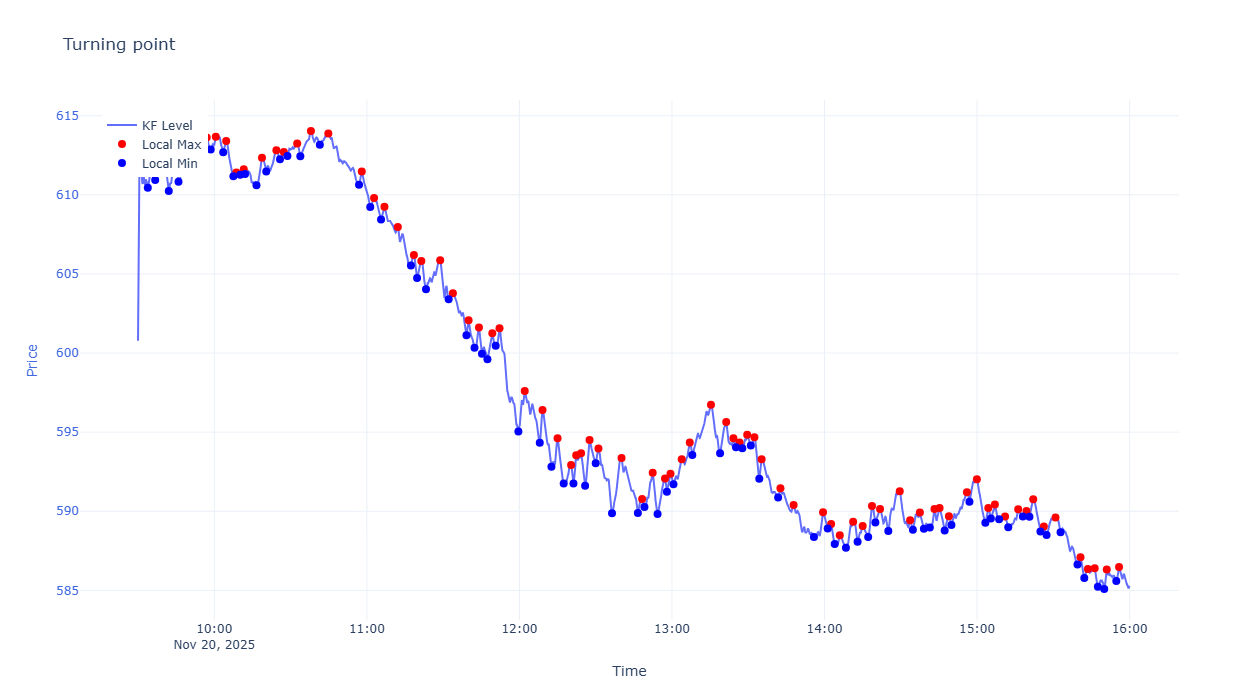

In [23]:
start = '2025-11-20 09:30:00-05:00'
end   = '2025-11-20 15:59:55-05:00'
df_plot = df_tp[(df_tp.index >= start) & (df_tp.index <= end)]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_plot.index, 
    y=df_plot["KF_level_adapt"], 
    mode="lines", 
    name="KF Level"
))

max_idx = df_plot.index[df_plot["TP_label"] == 1]
min_idx = df_plot.index[df_plot["TP_label"] == -1]

fig.add_trace(go.Scatter(
    x=max_idx,
    y=df_plot.loc[max_idx, "KF_level_adapt"],
    mode="markers",
    name="Local Max",
    marker=dict(color="red", size=8)
))

fig.add_trace(go.Scatter(
    x=min_idx,
    y=df_plot.loc[min_idx, "KF_level_adapt"],
    mode="markers",
    name="Local Min",
    marker=dict(color="blue", size=8)
))

fig.update_layout(
    title='Turning point',
    xaxis=dict(title='Time'),
    # xaxis=dict(title='Time', automargin=True, rangeslider=dict(visible=False), constrain='domain'),
    yaxis=dict(title='Price', color='royalblue'),
    # yaxis2=dict(
    #     title='Slope',
    #     color='red',
    #     overlaying='y',  # share the same x-axis
    #     side='right',
    #     range=[-50,50]
    # ),
    legend=dict(x=0.02, y=0.98),
    height=700,
    width=1000,
    template='plotly_white',
    hovermode='x unified'
    
)

fig.show()


In [21]:


# df_proc = process_raw_to_processed("AVGO", "2025-11-14", "2025-11-20", 5, overwrite=True)

# Load KF-processed data
df = load_processed_df("QCOM", "2025-11-14", "2025-11-20", 5)

# Apply turning point labeling
df_tp = label_turning_points(df, column="KF_level_adapt", L=20)

df_tp.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt', 'TP_label'],
      dtype='object')

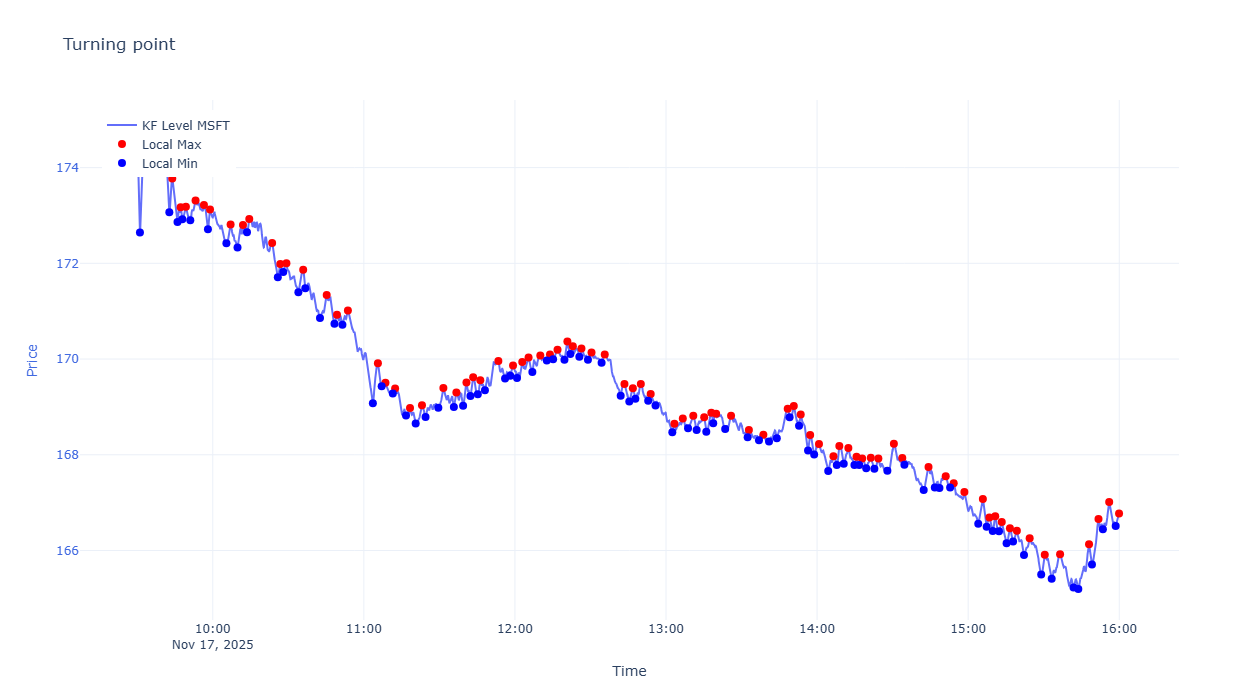

In [22]:
start = '2025-11-17 09:30:00-05:00'
end   = '2025-11-17 15:59:55-05:00'
df_plot = df_tp[(df_tp.index >= start) & (df_tp.index <= end)]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_plot.index, 
    y=df_plot["KF_level_adapt"], 
    mode="lines", 
    name="KF Level"
))

max_idx = df_plot.index[df_plot["TP_label"] == 1]
min_idx = df_plot.index[df_plot["TP_label"] == -1]

fig.add_trace(go.Scatter(
    x=max_idx,
    y=df_plot.loc[max_idx, "KF_level_adapt"],
    mode="markers",
    name="Local Max",
    marker=dict(color="red", size=8)
))

fig.add_trace(go.Scatter(
    x=min_idx,
    y=df_plot.loc[min_idx, "KF_level_adapt"],
    mode="markers",
    name="Local Min",
    marker=dict(color="blue", size=8)
))

fig.update_layout(
    title='Turning point',
    xaxis=dict(title='Time'),
    # xaxis=dict(title='Time', automargin=True, rangeslider=dict(visible=False), constrain='domain'),
    yaxis=dict(title='Price', color='royalblue'),
    # yaxis2=dict(
    #     title='Slope',
    #     color='red',
    #     overlaying='y',  # share the same x-axis
    #     side='right',
    #     range=[-50,50]
    # ),
    legend=dict(x=0.02, y=0.98),
    height=700,
    width=1000,
    template='plotly_white',
    hovermode='x unified'
    
)

fig.show()


In [29]:
F = np.arange(1, 5 + 1) / 5
F

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [ ]:
from data_utils import load_processed_df
from quant_utils import add_slope_quantiles, quantile_flags

df = load_processed_df("QQQ", "2025-11-19", "2025-11-20", 5)

dfq = add_slope_quantiles(df, slope_col="KF_slope_adapt", min_points=50)

flags = quantile_flags(dfq["slope_q_roll"], q_values=(0.9, 0.95, 0.97, 0.99))

dfq.head()


In [31]:
dfq.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt', 'slope_q_full',
       'slope_q_roll'],
      dtype='object')

In [41]:
a=np.array([1,1,-1,-1])
x=np.mean(a==1)
x

np.float64(0.5)

In [6]:
from data_utils import load_processed_df
from label_utils import label_turning_points
from quant_utils import add_slope_quantiles, conditional_probabilities_table

df = load_processed_df("MSFT", "2025-11-14", "2025-11-20", 5)

df = label_turning_points(df, L=20)
df = add_slope_quantiles(df, slope_col="KF_slope_adapt", min_points=50)

# Feasibility (cheating OK)
table_full = conditional_probabilities_table(df, q_col="slope_q_full")
print(table_full)

# Real-time (no cheating)
table_roll = conditional_probabilities_table(df, q_col="slope_q_roll")
print(table_roll)


   Threshold  P_max_given_high  P_min_given_low  P_max_baseline  \
0       0.90          0.057240         0.047884        0.017179   
1       0.95          0.057216         0.041880        0.017179   
2       0.97          0.061166         0.039886        0.017179   
3       0.99          0.051064         0.038462        0.017179   

   P_min_baseline  Lift_max  Lift_min  count_high  count_low  
0        0.016709  3.331909  2.865675        2341       2339  
1        0.016709  3.330487  2.506394        1171       1170  
2        0.016709  3.560434  2.387042         703        702  
3        0.016709  2.972372  2.301790         235        234  
   Threshold  P_max_given_high  P_min_given_low  P_max_baseline  \
0       0.90          0.056848         0.048018        0.017179   
1       0.95          0.053587         0.042264        0.017179   
2       0.97          0.065089         0.035714        0.017179   
3       0.99          0.054455         0.042781        0.017179   

   P_min_base

***Process Data***

In [10]:
from data_utils import process_raw_to_processed
from data_utils import load_processed_df
from label_utils import label_turning_points
from quant_utils import add_slope_quantiles, conditional_probabilities_table


# If not processed yet, process.
df_proc = process_raw_to_processed("AAPL", "2025-11-14", "2025-11-20", 5, overwrite=True)

# Load KF-processed data
df = load_processed_df("AAPL", "2025-11-14", "2025-11-20", 5)

# Apply turning point labeling
df_tp = label_turning_points(df, column="KF_level_adapt", L=20)

df = label_turning_points(df, L=20)
df = add_slope_quantiles(df, slope_col="KF_slope_adapt", min_points=50)

# Feasibility (cheating OK)
table_full = conditional_probabilities_table(df, q_col="slope_q_full")
print(table_full)

# Real-time (no cheating)
table_roll = conditional_probabilities_table(df, q_col="slope_q_roll")
print(table_roll)



Processed data saved to:
C:\Users\User\OneDrive\Projects\TradingSystem\Data\ProcessedData\AAPL_2025-11-14_2025-11-20_5.csv
Shape: (23400, 17)
   Threshold  P_max_given_high  P_min_given_low  P_max_baseline  \
0       0.90          0.060658         0.049166        0.017436   
1       0.95          0.053800         0.050427        0.017436   
2       0.97          0.054054         0.039886        0.017436   
3       0.99          0.046809         0.055556        0.017436   

   P_min_baseline  Lift_max  Lift_min  count_high  count_low  
0         0.01735  3.478905  2.833723        2341       2339  
1         0.01735  3.085598  2.906404        1171       1170  
2         0.01735  3.100159  2.298851         703        702  
3         0.01735  2.684606  3.201970         235        234  
   Threshold  P_max_given_high  P_min_given_low  P_max_baseline  \
0       0.90          0.063025         0.050116        0.017436   
1       0.95          0.058423         0.047812        0.017436   
2     

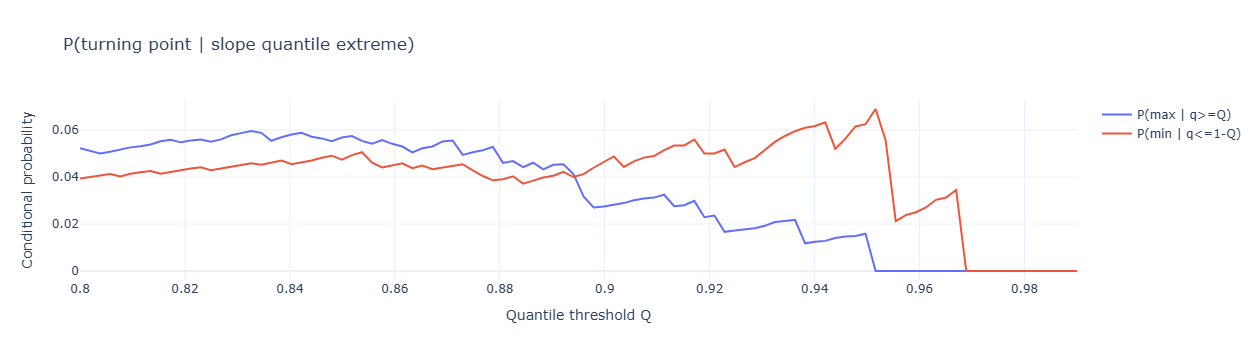

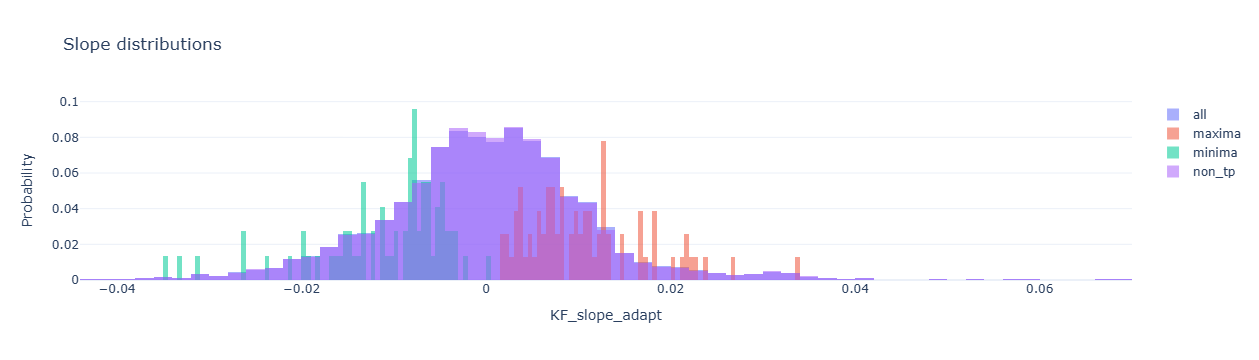

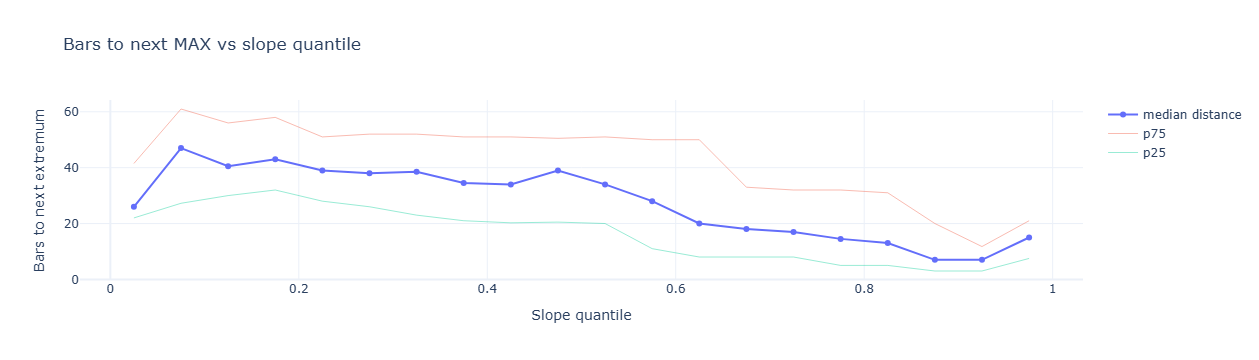

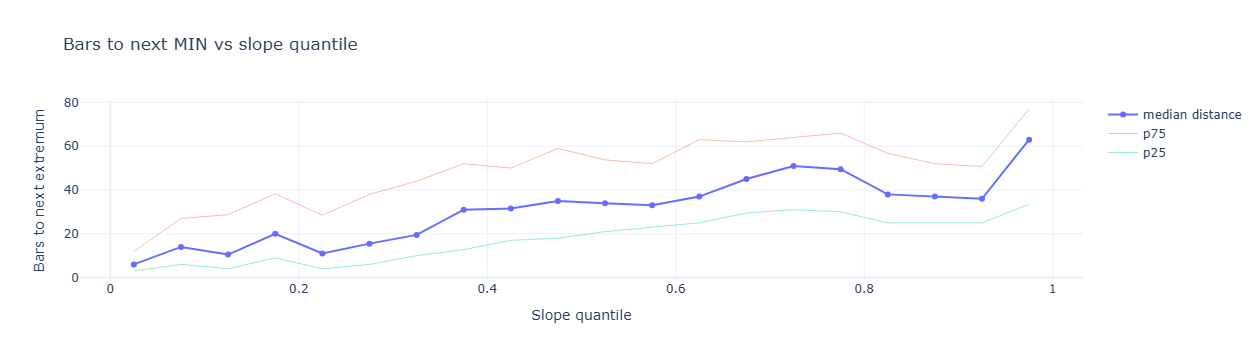

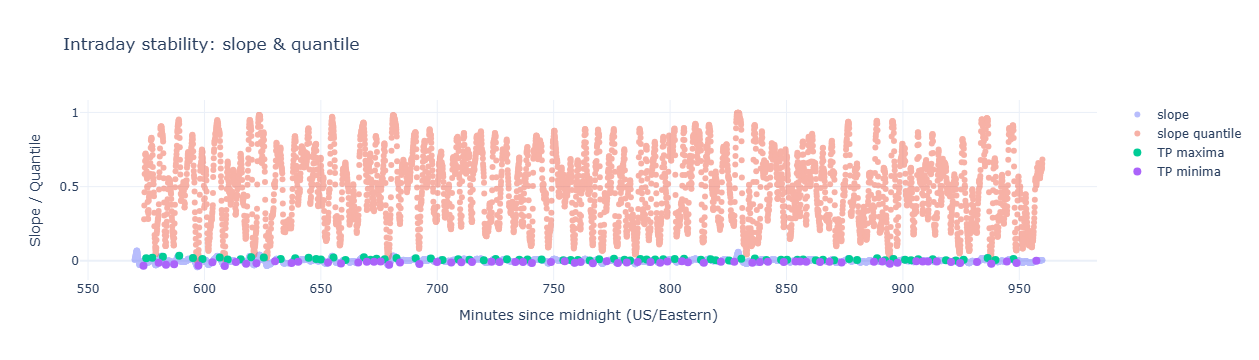

In [26]:
from analysis_utils import analyze_day, plot_probability_curve, plot_slope_distributions, plot_distance_curve, plot_intraday_stability

df_final, art = analyze_day("QQQ", "2025-11-21", interval=5, L=20)

# 1) probability curve
fig1 = plot_probability_curve(art["prob_curve_df"])
fig1.show()

# 2) slope distributions by TP class
fig2 = plot_slope_distributions(df_final)
fig2.show()

# 3) distance curves
fig3 = plot_distance_curve(art["dist_curve_max_df"], title="Bars to next MAX vs slope quantile")
fig3.show()

fig4 = plot_distance_curve(art["dist_curve_min_df"], title="Bars to next MIN vs slope quantile")
fig4.show()

# 4) intraday stability
fig5 = plot_intraday_stability(df_final)
fig5.show()


In [9]:
from src.data.data_utils import process_raw_to_processed
from src.data.data_utils import load_processed_df
from src.labeling.label_utils import label_turning_points
from src.quant.quant_utils import add_slope_quantiles, conditional_probabilities_table
df = load_processed_df("QCOM", "2025-11-14", "2025-11-20", 5)

In [10]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt'],
      dtype='object')

In [ ]:
from batch_utils import process_all_raw_files

process_all_raw_files(interval=5, overwrite=False)


In [ ]:
from batch_utils import analyze_all_processed_files, update_analysis_ledger

results = analyze_all_processed_files(
    symbols=None,        # or ["TSLA","AAPL"]
    date_list=None,      # or ["2025-11-17","2025-11-18"]
    interval=5,
    L=20,
    use_roll_quantiles=True
)

ledger = update_analysis_ledger(results)
ledger.head()


In [12]:
ledger_path = r"C:\Users\User\OneDrive\Projects\TradingSystem\Data\ProcessedData\analysis_ledger.csv"
ledger = pd.read_csv(ledger_path)


In [14]:
ledger["symbol"].unique()


array(['AAPL', 'AMZN', 'AVGO', 'META', 'MSFT', 'NVDA', 'ORCL', 'QCOM',
       'QQQ', 'TSLA'], dtype=object)

In [15]:
ledger[["start_date", "end_date"]].head()


start_date    end_date
0  2025-11-14  2025-11-20
1  2025-11-21  2025-11-21
2  2025-11-14  2025-11-20
3  2025-11-21  2025-11-21
4  2025-11-14  2025-11-20

In [16]:
ledger.sort_values("Lift_max_0_95", ascending=False).head()


filename symbol  start_date    end_date  interval  \
12  QCOM_2025-11-14_2025-11-20_5.csv   QCOM  2025-11-14  2025-11-20         5   
16   QQQ_2025-11-19_2025-11-20_5.csv    QQQ  2025-11-19  2025-11-20         5   
15   QQQ_2025-11-17_2025-11-21_5.csv    QQQ  2025-11-17  2025-11-21         5   
10  ORCL_2025-11-14_2025-11-20_5.csv   ORCL  2025-11-14  2025-11-20         5   
14   QQQ_2025-11-12_2025-11-18_5.csv    QQQ  2025-11-12  2025-11-18         5   

    n_bars    q_col_used  P_max_baseline  P_min_baseline  peak_P_max  ...  \
12   23400  slope_q_roll        0.017479        0.017607    0.069909  ...   
16    9360  slope_q_roll        0.016346        0.016346    0.063492  ...   
15   23400  slope_q_roll        0.016496        0.016282    0.061303  ...   
10   23400  slope_q_roll        0.016538        0.016752    0.061864  ...   
14   23400  slope_q_roll        0.016239        0.016325    0.063325  ...   

    Lift_max_0_97  Lift_min_0_97  count_high_0_97  count_low_0_97  \
12       3.624335       3.077189            663.0           646.0   
16       3.811618       2.725010            321.0           449.0   
15       3.181805       2.712912            724.0           815.0   
10       3.069973       2.542517            453.0           540.0   
14       3.635451       2.777743           1101.0           838.0   

    P_max_given_high_0_99  P_min_given_low_0_99  Lift_max_0_99  Lift_min_0_99  \
12               0.056497              0.057692       3.232357       3.276699   
16               0.057851              0.038889       3.539135       2.379085   
15               0.045977              0.036667       2.787207       2.251969   
10               0.049180              0.033708       2.973694       2.012153   
14               0.063325              0.027586       3.899458       1.689836   

    count_high_0_99  count_low_0_99  
12            177.0           156.0  
16            121.0           180.0  
15            261.0           300.0  
10            122.0           178.0  
14            379.0           290.0  

[5 rows x 39 columns]

In [ ]:
from signal_utils import add_turning_regions

df2 = add_turning_regions(df_final, q_col="slope_q_roll", Q_high=0.90)
df2[["slope_q_roll", "region_max", "region_min"]].head(20)


In [6]:
os.getcwd()

'C:\\Users\\User\\OneDrive\\Projects\\TradingSystem\\KF_TradingSystem\\notebooks'

In [2]:
from src.data.data_utils import process_raw_to_processed
from src.data.data_utils import load_processed_df
from src.labeling.label_utils import label_turning_points
from src.quant.quant_utils import add_slope_quantiles, conditional_probabilities_table
df_proc = load_processed_df("QQQ", "2025-11-12", "2025-11-18", 5)

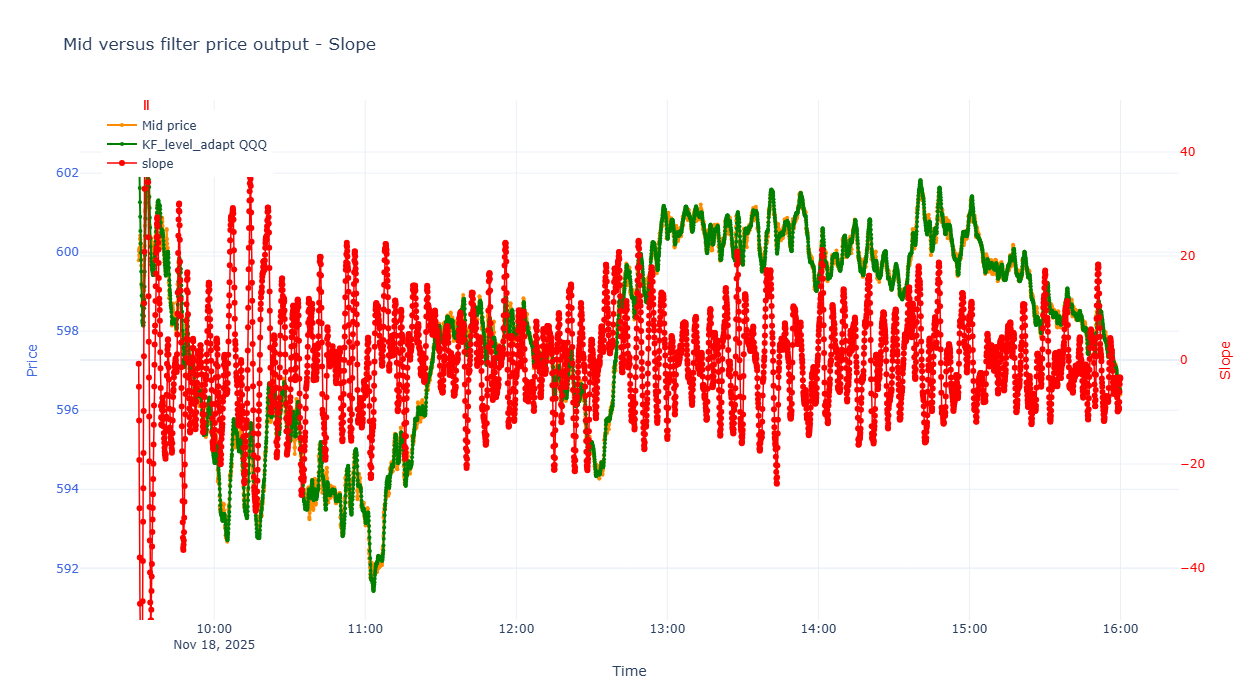

In [3]:

start = '2025-11-18 09:30:00-05:00'
end   = '2025-11-18 15:59:55-05:00'
df_range = df_proc[(df_proc.index >= start) & (df_proc.index <= end)]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_range.index,
    y=df_range['Mid'],
    mode='lines+markers',  # show both lines and dots
    name='Mid price',
    line=dict(color='darkorange', width=2),
    marker=dict(size=4, color='darkorange'),  # small dots
    yaxis='y1'
))
fig.add_trace(go.Scatter(
    x=df_range.index,
    y=df_range['KF_level_adapt'],
    mode='lines+markers',  # show both lines and dots
    name='KF_level_adapt QQQ',
    line=dict(color='green', width=2),
    marker=dict(size=4, color='green'),  # small dots
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=df_range.index, y=1000*df_range['KF_slope_adapt'],
    mode='lines+markers', name='slope',
    line=dict(color='red', width=1.5),
    yaxis='y2'
))


fig.update_layout(
    title='Mid versus filter price output - Slope',
    xaxis=dict(title='Time'),
    # xaxis=dict(title='Time', automargin=True, rangeslider=dict(visible=False), constrain='domain'),
    yaxis=dict(title='Price', color='royalblue'),
    yaxis2=dict(
        title='Slope',
        color='red',
        overlaying='y',  # share the same x-axis
        side='right',
        range=[-50,50]
    ),
    legend=dict(x=0.02, y=0.98),
    height=700,
    width=1000,
    template='plotly_white',
    hovermode='x unified'
    
)



fig.show()

In [3]:
from src.data.data_utils import load_processed_df
from src.labeling.label_utils import label_turning_points
from src.quant.quant_utils import add_slope_quantiles
from src.signals.signal_utils import add_turning_regions, add_slope_peaks
from src.data.data_utils import process_raw_to_processed



# If not processed yet, process.
df_proc = process_raw_to_processed("QQQ", "2025-11-24", "2025-11-24", 5, overwrite=True)

df_proc = load_processed_df("QQQ", "2025-11-24", "2025-11-24", 5)

# ADD THIS STEP
df_proc = add_slope_quantiles(df_proc, slope_col="KF_slope_adapt", min_points=50)

df_sig = add_turning_regions(df_proc, q_col="slope_q_roll", Q_high=0.95)
df_sig = add_slope_peaks(df_sig, smooth=False)

# df_sig[[
#     "KF_slope_adapt", "slope_q_roll", "region_max", "region_min",
#     "slope_peak_max", "slope_peak_min"
# ]].tail(50)


Processed data saved to:
C:\Users\User\OneDrive\Projects\TradingSystem\Data\ProcessedData\QQQ_2025-11-24_2025-11-24_5.csv
Shape: (4680, 17)


In [7]:
start = '2025-11-24 09:30:00-05:00'
end   = '2025-11-24 15:59:55-05:00'

df_range = df_sig[(df_sig.index >= start) & (df_sig.index <= end)]


In [8]:


def plot_price_with_signals(df, title="Price with Turning Regions and Slope Peaks"):
    
    fig = go.Figure()

    # --- PRICE LINE ---
    fig.add_trace(go.Scatter(
        # x=df.index, y=df["KF_level_adapt"],
        x=df.index, y=df["Mid"],
        mode="lines",
        name="Mid",
        line=dict(color="black", width=1)
    ))

    # --- REGION MAX (shaded red) ---
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df["KF_level_adapt"].where(df["region_max"], None),
        mode="markers",
        name="Region MAX",
        marker=dict(color="rgba(255,0,0,0.3)", size=6),
        showlegend=True
    ))

    # --- REGION MIN (shaded blue) ---
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df["KF_level_adapt"].where(df["region_min"], None),
        mode="markers",
        name="Region MIN",
        marker=dict(color="rgba(0,0,255,0.3)", size=6),
        showlegend=True
    ))

    # --- SLOPE PEAK MAX (timing for short) ---
    fig.add_trace(go.Scatter(
        x=df.index[df["slope_peak_max"]],
        y=df["KF_level_adapt"][df["slope_peak_max"]],
        mode="markers",
        name="Slope Peak MAX",
        marker=dict(color="red", size=10, symbol="triangle-down"),
        showlegend=True
    ))

    # --- SLOPE PEAK MIN (timing for long) ---
    fig.add_trace(go.Scatter(
        x=df.index[df["slope_peak_min"]],
        y=df["KF_level_adapt"][df["slope_peak_min"]],
        mode="markers",
        name="Slope Peak MIN",
        marker=dict(color="blue", size=10, symbol="triangle-up"),
        showlegend=True
    ))

    fig.update_layout(
        title=title,
        height=600,
        width=1200,
        template="plotly_white",
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
        xaxis_title="Time",
        yaxis_title="Price (KF Level)",
    )

    fig.show()


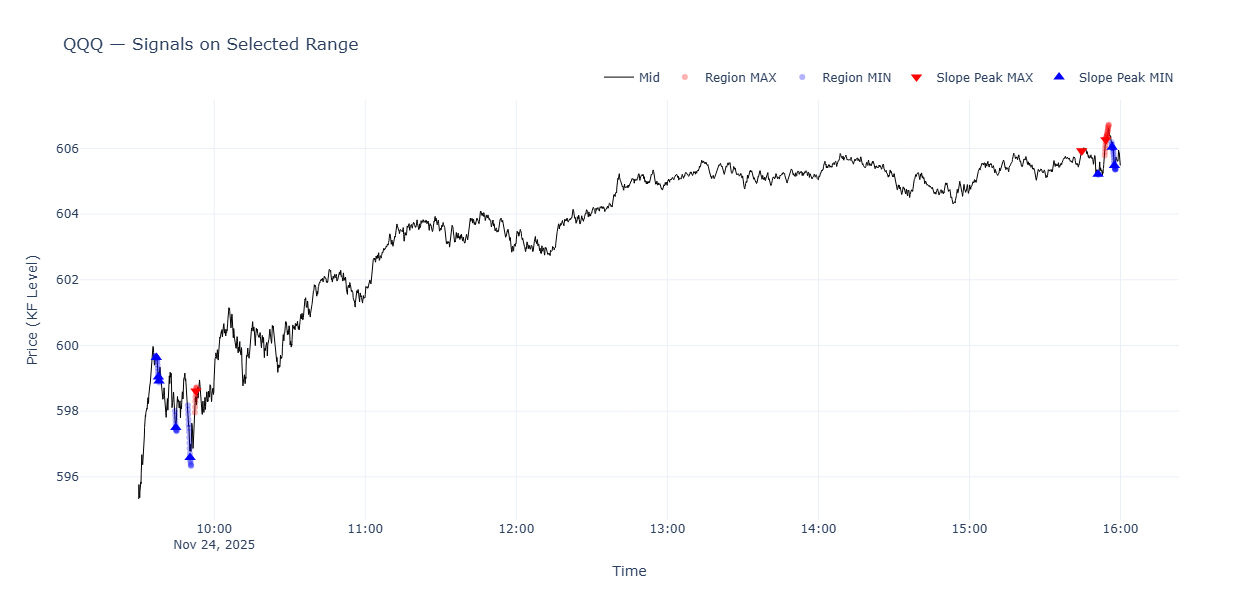

In [9]:
plot_price_with_signals(df_range, title="QQQ — Signals on Selected Range")


In [10]:
df_sig.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt', 'slope_q_full',
       'slope_q_roll', 'region_max', 'region_min', 'slope_peak_max',
       'slope_peak_min'],
      dtype='object')

In [11]:
df_proc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt', 'slope_q_full',
       'slope_q_roll', 'region_max', 'region_min', 'slope_peak_max',
       'slope_peak_min'],
      dtype='object')

In [4]:
from src.data.data_utils import load_processed_df
from src.quant.quant_utils import add_slope_quantiles
from src.signals.signal_utils import (
    add_turning_regions, add_slope_peaks, add_entry_signals
)

# 1. Load processed KF data
df_proc = load_processed_df(
    symbol="QQQ",
    start="2025-11-12",
    end="2025-11-18",
    interval=5,
)

# 2. Add slope quantiles (this creates slope_q_roll)
df_proc = add_slope_quantiles(df_proc)

# 3. Add turning regions (Stage 3.1)
df_proc = add_turning_regions(df_proc, q_col="slope_q_roll", Q_high=0.95)

# 4. Add slope peaks (Stage 3.2)
df_proc = add_slope_peaks(df_proc)

# 5. Add entry signals (Stage 3.3)
df_proc = add_entry_signals(df_proc)

df_proc[["entry_long", "entry_short"]].sum()


entry_long     145
entry_short    181
dtype: int64

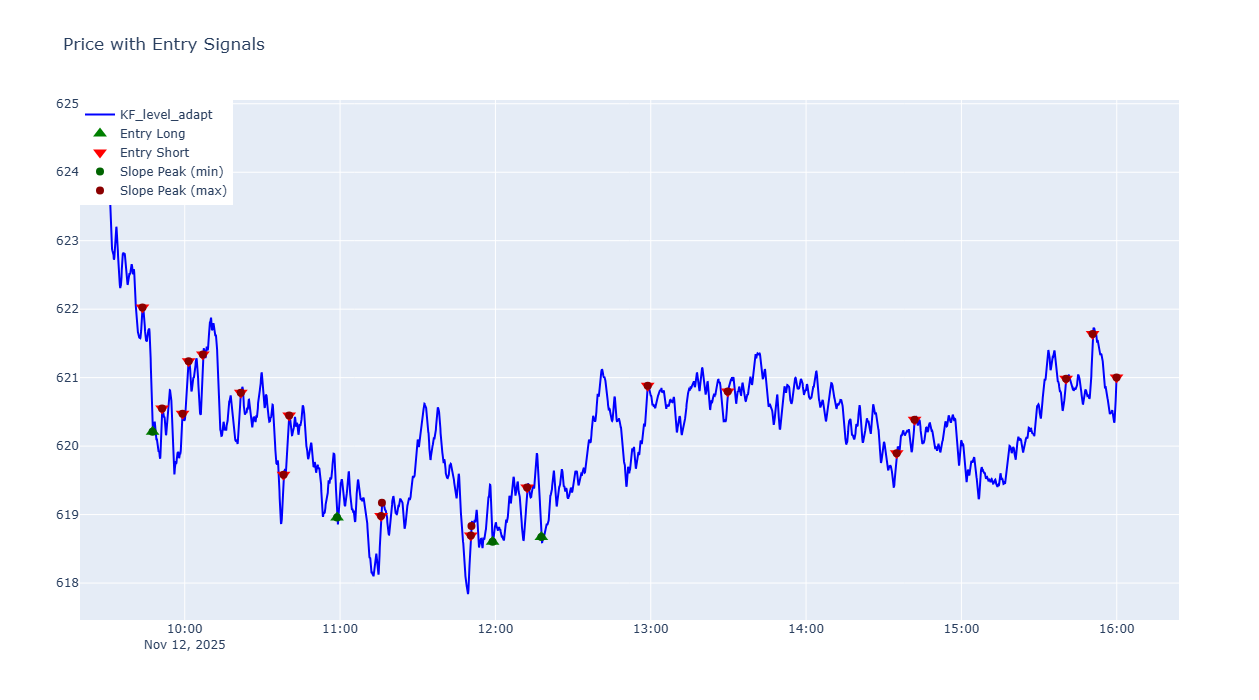

In [20]:
import plotly.graph_objects as go

def plot_entries(df, price_col="KF_level_adapt", 
                 show_peaks=True, show_regions=False):

    fig = go.Figure()

    # -------------------------
    # Price line
    # -------------------------
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[price_col],
        mode='lines',
        name=price_col,
        line=dict(color="blue")
    ))

    # -------------------------
    # Entry LONG markers
    # -------------------------
    long_idx = df.index[df["entry_long"] == True]
    fig.add_trace(go.Scatter(
        x=long_idx,
        y=df.loc[long_idx, price_col],
        mode='markers',
        name='Entry Long',
        marker=dict(symbol="triangle-up", size=12, color="green")
    ))

    # -------------------------
    # Entry SHORT markers
    # -------------------------
    short_idx = df.index[df["entry_short"] == True]
    fig.add_trace(go.Scatter(
        x=short_idx,
        y=df.loc[short_idx, price_col],
        mode='markers',
        name='Entry Short',
        marker=dict(symbol="triangle-down", size=12, color="red")
    ))

    # -------------------------
    # Optional: slope peaks
    # -------------------------
    if show_peaks:
        peak_min_idx = df.index[df["slope_peak_min"] == True]
        peak_max_idx = df.index[df["slope_peak_max"] == True]

        fig.add_trace(go.Scatter(
            x=peak_min_idx,
            y=df.loc[peak_min_idx, price_col],
            mode='markers',
            name='Slope Peak (min)',
            marker=dict(symbol="circle", size=8, color="darkgreen")
        ))

        fig.add_trace(go.Scatter(
            x=peak_max_idx,
            y=df.loc[peak_max_idx, price_col],
            mode='markers',
            name='Slope Peak (max)',
            marker=dict(symbol="circle", size=8, color="darkred")
        ))

    # -------------------------
    # Optional: turning regions
    # -------------------------
    if show_regions:
        fig.add_trace(go.Scatter(
            x=df.index,
            y=df[region_min_col] * df[price_col].max(),
            mode='lines',
            name='region_min',
            line=dict(color="green", width=1, dash="dot"),
            opacity=0.3,
            yaxis="y2",
        ))

        fig.add_trace(go.Scatter(
            x=df.index,
            y=df[region_max_col] * df[price_col].max(),
            mode='lines',
            name='region_max',
            line=dict(color="red", width=1, dash="dot"),
            opacity=0.3,
            yaxis="y2",
        ))

        fig.update_layout(
            yaxis2=dict(
                overlaying='y',
                side='right',
                range=[0, df[price_col].max()]
            )
        )

    # -------------------------
    # Layout
    # -------------------------
    fig.update_layout(
        title="Price with Entry Signals",
        legend=dict(x=0, y=1),
        height=700
    )

    fig.show()

# Call it:
start = '2025-11-12 09:30:00-05:00'
end   = '2025-11-12 15:59:55-05:00'

df_range = df_proc[(df_proc.index >= start) & (df_proc.index <= end)]

plot_entries(df_range)


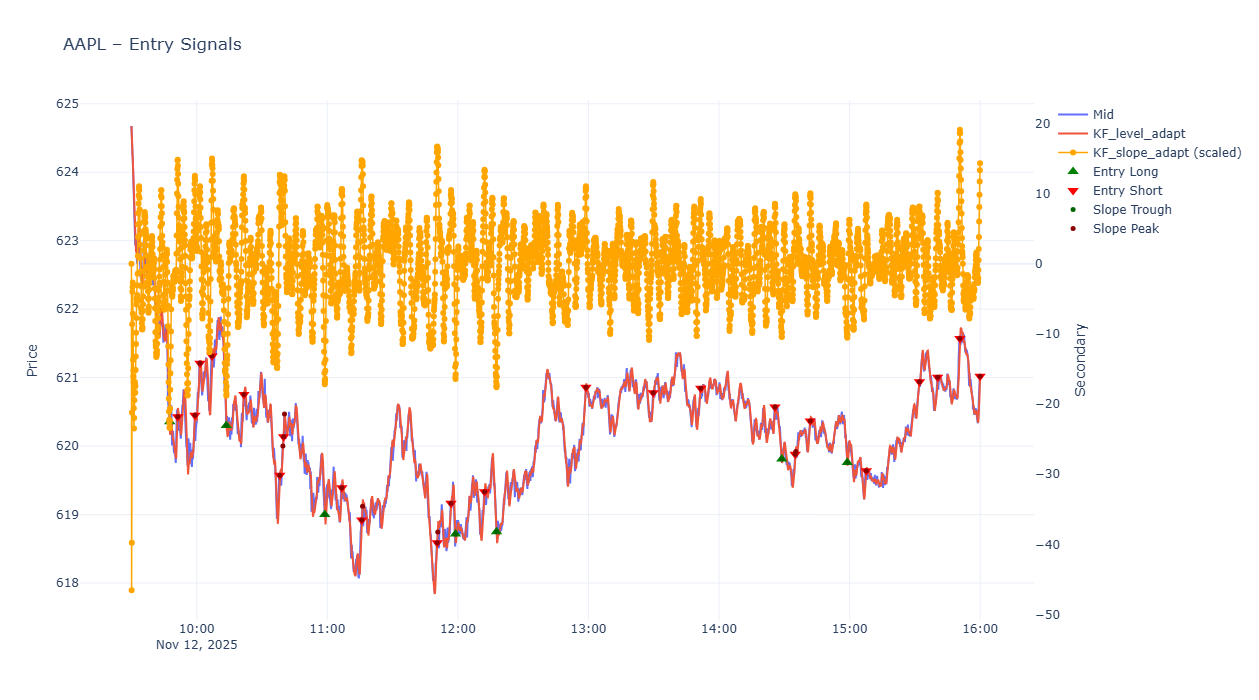

In [5]:
from src.visualization.plot_utils import plot_price_signals
start = '2025-11-12 09:30:00-05:00'
end   = '2025-11-12 15:59:55-05:00'

df_range = df_proc[(df_proc.index >= start) & (df_proc.index <= end)]
plot_price_signals(
    df_range,
    price_cols=("Mid", "KF_level_adapt"),
    secondary_cols=("KF_slope_adapt",),
    secondary_scale=1000,      # scale slope
    entry_long_col="entry_long",
    entry_short_col="entry_short",
    show_peaks=True,
    title="AAPL – Entry Signals"
)


In [4]:
from src.data.data_utils import load_processed_df
from src.quant.quant_utils import add_slope_quantiles
from src.signals.signal_utils import (
    add_turning_regions,
    add_slope_peaks,
    add_entry_signals,
    add_exit_signals,
    add_level_peaks
)
from src.visualization.plot_utils import plot_price_signals

df_proc = load_processed_df(
    symbol="QQQ",
    start="2025-11-17",
    end="2025-11-21",
    interval=5,
)

# Quantiles
df_proc = add_slope_quantiles(df_proc)  # adds slope_q_roll

# Regions & peaks
df_proc = add_turning_regions(df_proc, q_col="slope_q_roll", Q_high=0.95)
df_proc = add_slope_peaks(df_proc)
# df_proc = add_level_peaks(df_proc) 

# Entries & exits
df_proc = add_entry_signals(df_proc)
# df_proc = add_exit_signals(df_proc, max_holding_bars=10)

# Quick sanity check
# df_proc[["entry_long", "exit_long", "entry_short", "exit_short"]].sum()
df_proc[["entry_long", "entry_short",]].sum()


entry_long     139
entry_short    122
dtype: int64

In [7]:
df_proc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Mid', 'Spread',
       'var_dMid', 'var_acc', 'Spread_smooth', 'KF_level_adapt',
       'KF_slope_adapt', 'KF_curv_adapt', 'KF_level_var_adapt',
       'KF_slope_var_adapt', 'KF_curv_var_adapt', 'slope_q_full',
       'slope_q_roll', 'region_max', 'region_min', 'slope_peak_max',
       'slope_peak_min', 'entry_long', 'entry_short'],
      dtype='object')

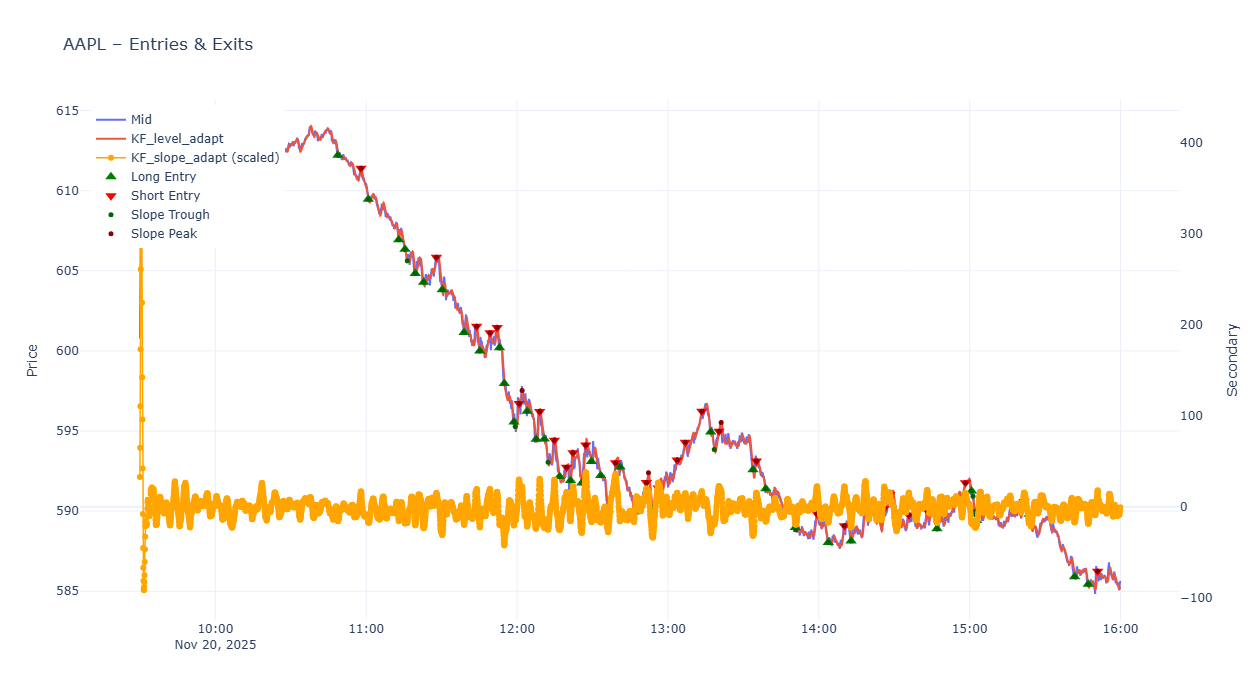

In [10]:
from src.visualization.plot_utils import plot_price_signals
start = '2025-11-20 09:30:00-05:00'
end   = '2025-11-20 15:59:55-05:00'
df_range = df_proc[(df_proc.index >= start) & (df_proc.index <= end)]

plot_price_signals(
    df_range,
    price_cols=("Mid", "KF_level_adapt"),
    secondary_cols=("KF_slope_adapt",),
    secondary_scale=1000,
    show_peaks=True,
    title="QQQ – Entries & Exits"
)


In [14]:

# Find first entry (long or short)
entry_indices = df_proc.index[(df_proc["entry_long"] == True) | (df_proc["entry_short"] == True)]

if len(entry_indices) == 0:
    print("No entries found.")
else:
    idx0 = entry_indices[0]
    print("First entry at:", idx0)


First entry at: 2025-11-17 09:42:30-05:00


In [16]:
diagnostic_slice.to_csv("entry_exit_diagnostic.csv")
print("Saved to entry_exit_diagnostic.csv")


Saved to entry_exit_diagnostic.csv


In [17]:
os.getcwd()

'C:\\Users\\User\\OneDrive\\Projects\\TradingSystem\\KF_TradingSystem\\notebooks'